In [157]:
### Importing all the required packages and loading csv files
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn import preprocessing
import numpy as np
data = pd.read_csv('Dataset/Dataset.txt')
data_attack = pd.read_csv('Dataset/Attack_types.txt')


# Create new DataFrame with 'Attack category' column
att_cat = data[['attack_category']].copy()

# View the resulting DataFrame
att_cat.head()



,attack_category
0,normal
1,normal
2,neptune
3,normal
4,normal


In [158]:
### seperating attack types and categories in attacktype.txt
data_attack[['attack_category', 'attack_type']] = data_attack['attack_category attack_type'].str.split(' ', expand=True)
data_attack.drop('attack_category attack_type',axis = 1, inplace=True)
data_attack.head()

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [159]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [160]:
# my_dict = data_attack.set_index('category')['type'].to_dict()
# my_dict
# merging/joining both datafarmes so that mapping could be done
data = data.merge(data_attack, on='attack_category', how='left')


In [161]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN


In [133]:
# for tye in target['attack_category']:
#         target['attack'] = ''

# target.head()
    


In [162]:
# for tye in target['attack_category']:
#         pass
# counting value= normal in the dataset
data['attack_category'].value_counts()['normal']


67343

In [163]:
# checking null values
nulls =data.isnull().sum()
print(nulls , data.shape)

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [164]:
# replacing all the null values in attack type with normal because no attack occured
data['attack_type'] = data['attack_type'].replace(np.nan,'normal')

In [165]:
data['attack_type'].value_counts()['normal']

67343

In [166]:
# null values removed 
nulls =data.isnull().sum()
print(nulls , data.shape)


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [167]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
125979,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,dos
125980,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,normal
125981,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,normal
125982,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,dos
125983,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,normal


In [171]:
# dropping attack category column because it is no longer needed
data.drop('attack_category' ,axis = 1, inplace=True)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [172]:
for i in data:
    if data[i].dtype == 'object':
        print(f" {i} = {data[i].unique()}")

 protocol_type = ['tcp' 'udp' 'icmp']
 service = ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
 flag = ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
 attack_type = ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [173]:
data.shape


(125984, 43)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125984 entries, 0 to 125983
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125984 non-null  int64  
 1   protocol_type                125984 non-null  object 
 2   service                      125984 non-null  object 
 3   flag                         125984 non-null  object 
 4   src_bytes                    125984 non-null  int64  
 5   dst_bytes                    125984 non-null  int64  
 6   land                         125984 non-null  int64  
 7   wrong_fragment               125984 non-null  int64  
 8   urgent                       125984 non-null  int64  
 9   hot                          125984 non-null  int64  
 10  num_failed_logins            125984 non-null  int64  
 11  logged_in                    125984 non-null  int64  
 12  num_compromised              125984 non-null  int64  
 13 

In [175]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125984.000000,1.259840e+05,1.259840e+05,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,...,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000
mean,287.120150,4.556280e+04,1.978262e+04,0.000198,0.022685,0.000111,0.204423,0.001222,0.395709,0.279353,...,115.643391,0.521276,0.082944,0.148424,0.032540,0.284478,0.278511,0.118822,0.120229,19.503707
std,2604.402926,5.870075e+06,4.021094e+06,0.014085,0.253519,0.014365,2.149887,0.045237,0.489004,23.941038,...,110.702693,0.448952,0.188915,0.309041,0.112559,0.444780,0.445665,0.306546,0.319447,2.292028
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<AxesSubplot:xlabel='duration', ylabel='Count'>

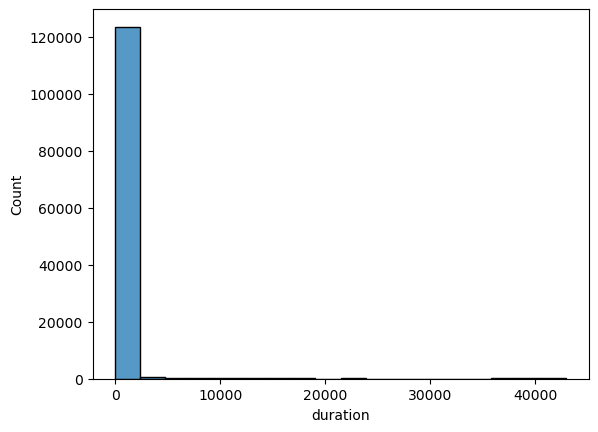

In [148]:
sns.histplot(data['duration'])

<AxesSubplot:xlabel='urgent', ylabel='Count'>

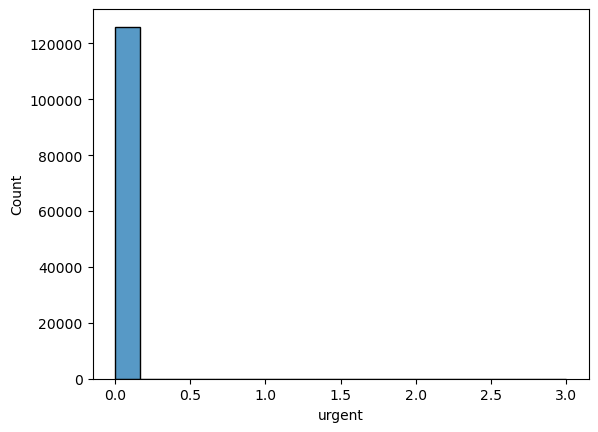

In [28]:
sns.histplot(data['urgent'])

In [176]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (20, 43)


In [177]:
data.count() 

duration                       125984
protocol_type                  125984
service                        125984
flag                           125984
src_bytes                      125984
dst_bytes                      125984
land                           125984
wrong_fragment                 125984
urgent                         125984
hot                            125984
num_failed_logins              125984
logged_in                      125984
num_compromised                125984
root_shell                     125984
su_attempted                   125984
num_root                       125984
num_file_creations             125984
num_shells                     125984
num_access_files               125984
num_outbound_cmds              125984
is_host_login                  125984
is_guest_login                 125984
count                          125984
srv_count                      125984
serror_rate                    125984
srv_serror_rate                125984
rerror_rate 

In [179]:
data.shape

(125984, 43)

In [181]:
data = data.drop_duplicates()

In [182]:
data.shape

(125964, 43)

In [183]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
